In [848]:
import pandas as pd
import argparse
import collections
import csv
import simplejson as json
import random
import gc
import os
import glob
import numpy as np
import re
import datetime as dt
# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
# modelling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
#os.chdir("../project3/data/yelp_dataset_2020/selected/Round_3")
#os.chdir(os.getcwd())
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 500)
pd.set_option("display.max_rows", 100)
pd.set_option('display.max_colwidth', -1)
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

#pd.set_option('display.max_colwidth', 0)

#DO NOT RUN
#extension = 'csv'
#all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#df_scope_elite_19 = pd.concat([pd.read_csv(f, names=['user_id','elite_status']) for f in all_filenames ])
##export to csv
#df_scope_elite_19.to_csv( "yelp_selected_elites.csv", index=False, encoding='utf-8-sig')

In [849]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=18):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names, )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [30]:
#Randomly Sampled -200000 Users are in both 2017,2018 data or in 2018 but started yelping in 2018
scope_yelp_users = pd.read_csv('../project3/select_users.csv', nrows=200001)

In [841]:
df_user_18 = pd.read_csv('../project3/data/yelp_dataset_2019/user.csv')
df_user_18 = df_user_18.reindex(sorted(df_user_18.columns), axis=1)
df_user_18.drop_duplicates(keep=False,inplace=True) 
df_scope_user_18 = scope_yelp_users.merge(df_user_18, left_on='user_id', right_on='user_id').copy()

del [[df_user_18]]
gc.collect()

/Users/chen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


98

In [840]:
Need to write something to count elite friends

NameError: name 'df_user_18' is not defined

In [33]:
#DEFINTE SELECTED ELITES - not predicting 2019
#df_scope_elite_19 = pd.read_csv('../project3/data/yelp_dataset_2020/selected/Round_3/yelp_selected_elites.csv')
#df_scope_elite_19['2019_elite_status'] = df_scope_elite_19['elite_status'].str.contains('19')
#df_scope_user_18 = df_scope_user_18.merge(df_scope_elite_19, left_on='user_id', right_on='user_id').copy()

#del [[df_scope_elite_19]]
#gc.collect()

53

In [783]:
df_scope_review_18 = pd.read_csv('../project3/2018_review.csv')

In [35]:
#2018 RAW
#df_review_18 = pd.read_csv('../project3/data/yelp_dataset_2019/review.csv')
#df_review_18 = df_review_18.reindex(sorted(df_review_18.columns), axis=1)
#df_scope_review_18 = scope_yelp_users.merge(df_review_18, left_on='user_id', right_on='user_id').copy()

#del [[df_review_18]]
#gc.collect()

0

In [36]:
#df_scope_review_18.to_csv('../project3/2018_review.csv', index=False, encoding='utf-8-sig')

In [800]:
df_tip_18 = pd.read_csv('../project3/data/yelp_dataset_2019/tip.csv')
df_tip_18 = df_tip_18.reindex(sorted(df_tip_18.columns), axis=1)
df_scope_tip_18 = scope_yelp_users.merge(df_tip_18, left_on='user_id', right_on='user_id').copy()

del [[df_tip_18]]
gc.collect()

127

In [784]:
df_business_18 = pd.read_csv('../project3/data/yelp_dataset_2019/business.csv')
df_scope_tip_business_18 = df_scope_tip_18.merge(df_business_18, how='left', left_on='business_id', right_on='business_id').copy()
df_scope_review_business_18 = df_scope_review_18.merge(df_business_18, how='left', left_on='business_id', right_on='business_id', suffixes=('_review', '_business')).copy()

del [[df_business_18]]
gc.collect()


/Users/chen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (18,34,40) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


541

In [787]:
#2017 Yelp Processing
df_user_17 = pd.read_csv('../project3/data/yelp_dataset_2018/yelp_academic_dataset_user.csv')
df_user_17 = df_user_17.reindex(sorted(df_user_17.columns), axis=1)
df_user_17.drop_duplicates(keep=False,inplace=True) 
df_scope_user_17 = scope_yelp_users.merge(df_user_17,how='left', left_on='user_id', right_on='user_id').copy()

del [[df_user_17]]
gc.collect()

72

In [9]:
df_scope_review_17 = pd.read_csv('../project3/2017_review.csv')

In [40]:
#df_review_17 = pd.read_csv('../project3/data/yelp_dataset_2018/yelp_academic_dataset_review.csv')
#df_scope_review_17 = scope_yelp_users.merge(df_review_17, left_on='user_id', right_on='user_id').copy()

#del [[df_review_17]]
#gc.collect()

0

In [41]:
#df_scope_review_17.to_csv('../project3/2017_review.csv', index=False, encoding='utf-8-sig')

In [42]:
df_tip_17 = pd.read_csv('../project3/data/yelp_dataset_2018/yelp_academic_dataset_tip.csv')
df_scope_tip_17 = scope_yelp_users.merge(df_tip_17, left_on='user_id', right_on='user_id').copy()

del [[df_tip_17]]
gc.collect()

40

In [355]:
df_business_17 = pd.read_csv('../project3/data/yelp_dataset_2018/yelp_academic_dataset_business.csv')
df_scope_tip_business_17 = df_scope_tip_17.merge(df_business_17, how='left', left_on='business_id', right_on='business_id').copy()
df_scope_review_business_17 = df_scope_review_17.merge(df_business_17, how='left', left_on='business_id', right_on='business_id',suffixes=('_review', '_business')).copy()

del [[df_business_17]]
gc.collect()

0

In [ ]:
#df_scope_tip_business_18
#df_scope_review_business_18
#df_scope_user_18
#df_scope_tip_business_17
#df_scope_review_business_17
#df_scope_user_17

In [ ]:
#2017 RAW
#df_review_17 = pd.read_csv('../project3/data/yelp_dataset_2018/yelp_academic_dataset_review.csv', nrows=1000)
#df_user_17 = pd.read_csv('../project3/data/yelp_dataset_2018/yelp_academic_dataset_user.csv', nrows=1000)
#df_tip_17 = pd.read_csv('../project3/data/yelp_dataset_2018/yelp_academic_dataset_tip.csv', nrows=1000)
#df_business_17 = pd.read_csv('../project3/data/yelp_dataset_2018/yelp_academic_dataset_business.csv', nrows=1000)
#df_checkin_17 = pd.read_csv('../project3/data/yelp_dataset_2018/yelp_academic_dataset_checkin.csv', nrows=1000)

In [ ]:
#df_scope_tip_business_18
#df_scope_review_business_18
#df_scope_user_18

In [801]:
df_scope_tip_18['date'] = pd.to_datetime(df_scope_tip_18['date']) 
df_scope_tip_17_18 = df_scope_tip_18[(df_scope_tip_18['date'].dt.year == 2018) | (df_scope_tip_18['date'].dt.year == 2017)]
df_scope_tip_17_18['count_words'] = df_scope_tip_17_18['text'].apply(lambda x: len(str(x).split(' ')))
df_scope_tip_17_18['count_chars'] = df_scope_tip_17_18['text'].str.len()


grouped_df_scope_tip_17_18 = df_scope_tip_17_18.groupby([df_scope_tip_17_18['date'].dt.year, df_scope_tip_17_18['user_id']]) \
       .agg({'compliment_count':'sum', 'count_words':'mean','count_chars':'mean'}) \
       .rename(columns={'compliment_count':'num_compliment','count_words':'mean_compliment_num_word','count_chars':'mean_compliment_num_chars'}) \
       .reset_index() \
       .sort_values(['user_id','date'],ascending=False)


/Users/chen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chen/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [804]:
flat_grouped_df_scope_tip_17_18 = grouped_df_scope_tip_17_18.pivot(index='user_id',\
                                                                                           columns='date'
                                                                                          ).reset_index()
flat_grouped_df_scope_tip_17_18.columns = flat_grouped_df_scope_tip_17_18.columns.map('{0[0]}_{0[1]}'.format) 

In [805]:
flat_grouped_df_scope_tip_17_18.rename(columns={'user_id_':'user_id'}, inplace=True)
flat_grouped_df_scope_tip_17_18.fillna(0, inplace=True)

In [718]:
#engineer reviews 2018
df_scope_review_business_18['date'] = pd.to_datetime(df_scope_review_business_18['date']) 
df_scope_review_business_18['count_words'] = df_scope_review_business_18['text'].apply(lambda x: len(str(x).split(' ')))
df_scope_review_business_18['count_chars'] = df_scope_review_business_18['text'].str.len()
df_scope_review_business_18['user_to_mean_variance'] = (df_scope_review_business_18['stars_business'] - df_scope_review_business_18['stars_review'])**2
df_scope_review_business_18['categories'] = df_scope_review_business_18['categories'].astype(str)



In [719]:
df_scope_review_business_17_18 = df_scope_review_business_18[(df_scope_review_business_18['date'].dt.year == 2018) | (df_scope_review_business_18['date'].dt.year == 2017)]


In [809]:
grouped_df_scope_review_business_17_18 = df_scope_review_business_17_18.groupby([df_scope_review_business_17_18['date'].dt.year,df_scope_review_business_17_18['user_id']]) \
       .agg({'review_id':'count', 'count_words':'mean','count_chars':'mean', 'user_to_mean_variance': 'mean',\
             'categories': ','.join}) \
       .rename(columns={'review_id':'num_reviews','count_words':'mean_review_num_word','count_chars':'mean_review_num_chars',\
                        'user_to_mean_variance':'mean_review_varience', 'categories': 'unique_categories'}) \
       .reset_index() \
       .sort_values(['user_id','date'],ascending=False)


In [810]:
flat_grouped_df_scope_review_business_17_18 = grouped_df_scope_review_business_17_18.pivot(index='user_id',\
                                                                                           columns='date'
                                                                                          ).reset_index()
flat_grouped_df_scope_review_business_17_18.columns = flat_grouped_df_scope_review_business_17_18.columns.map('{0[0]}_{0[1]}'.format) 

In [811]:
flat_grouped_df_scope_review_business_17_18.rename(columns={'user_id_':'user_id'}, inplace=True)
#flat_grouped_df_scope_review_business_17_18.fillna(0, inplace = True)
#flat_grouped_df_scope_review_business_17_18
flat_grouped_df_scope_review_business_17_18['unique_categories_2018']=flat_grouped_df_scope_review_business_17_18['unique_categories_2018'].\
apply(lambda x: len(np.unique(np.array([i.strip() for i in x.split(",")]))) if pd.notnull(x) else None
     )
flat_grouped_df_scope_review_business_17_18['unique_categories_2017']=flat_grouped_df_scope_review_business_17_18['unique_categories_2017'].\
apply(lambda x: len(np.unique(np.array([i.strip() for i in x.split(",")]))) if pd.notnull(x) else None
     )
flat_grouped_df_scope_review_business_17_18.fillna(0, inplace = True)

In [785]:
#engineer user 2018
df_scope_user_18['friends'].replace('None',np.NaN,inplace=True)
df_scope_user_18['num_friends'] = df_scope_user_18['friends'].map(lambda x: len([i.strip() for i in x.split(",")]) if pd.notnull(x) else None)
df_scope_user_18['2018_elite_status'] = df_scope_user_18['elite'].str.contains('2018')
df_scope_user_18['2017_elite_status'] = df_scope_user_18['elite'].str.contains('2017')
df_scope_user_18['num_years_elite'] = df_scope_user_18['elite'].map(lambda x: len([i.strip() for i in str(x).split(",")]) if pd.notnull(x) else None)
df_scope_user_18['elite'].fillna(0, inplace=True)
df_scope_user_18['num_compliments'] = df_scope_user_18[['compliment_cool', 'compliment_cute', 'compliment_funny', 'compliment_hot', 'compliment_list', 'compliment_more', 'compliment_note', 'compliment_photos', 'compliment_plain', 'compliment_profile', 'compliment_writer']].sum(axis=1)
df_scope_user_18['num_votes'] = df_scope_user_18[['cool','funny','useful']].sum(axis=1)
df_scope_user_18['yelping_since'] = pd.to_datetime(df_scope_user_18['yelping_since'])
end_date_18 = pd.to_datetime("12/31/2018")
df_scope_user_18['num_days_acct_created'] = (end_date_18-df_scope_user_18['yelping_since']).dt.days
df_scope_user_18['num_years_elite'].fillna(0, inplace = True) 
df_scope_user_18['2018_elite_status'].fillna(False, inplace = True)
df_scope_user_18['2018_elite_status'] = df_scope_user_18['2018_elite_status'].astype(int)
df_scope_user_18['2017_elite_status'].fillna(False, inplace = True)
df_scope_user_18['2017_elite_status'] = df_scope_user_18['2017_elite_status'].astype(int)





In [786]:
df_scope_user_18


,user_id,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,elite,fans,friends,funny,name,review_count,useful,yelping_since,num_friends,2018_elite_status,num_years_elite,num_compliments,num_votes,num_days_acct_created,2017_elite_status
0,qwiD67NYQR3PmRg5jnuRdA,4.14,0,0,0,0,0,0,1,0,0,0,0,10,0,1,"GGTF7hnQi6D5W77_qiKlqg, ptqOIs3ZwYPMU466assCQg",39,Mustapha,109,38,2014-12-11 00:19:59,2.0,0,1,1,87,1480,0
1,p-MUwKepqz9GVXN_TOw6QA,3.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1,Bianca,4,0,2016-04-26 20:40:42,NaN,0,1,0,1,978,0
2,3SM1prlFXIAw0DSS_HgSzg,3.38,0,0,0,1,0,1,0,0,1,0,0,28,0,2,"YB3VkwJhRiBeudErOBcGkA, 3su6_93gWpREGnC0RXP2wg...",29,Yongjoen,162,61,2013-12-17 18:19:23,3.0,0,1,3,118,1839,0
3,fu3Aeg82ynMB3ZaLkk3L4w,3.08,0,0,0,0,0,0,0,0,0,0,0,4,0,1,"EbwQ55SiAZqVPNXEwvHUnw, cinifUrqDUIEnSGpfNvDmg...",12,Maria,13,28,2012-08-21 17:04:05,91.0,0,1,0,44,2322,0
4,FFTdfe86jTpYJYkLQTHSHw,2.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"T0C1Ac5jqgL8yTmnSeICNw, MSsUkZTDoLRWnx6FqvO2rA...",0,Chris,2,1,2011-02-05 19:15:13,832.0,0,1,0,1,2885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199996,JBYHvl7Y7d5Y4e44eqzJBw,3.84,0,0,0,0,0,0,0,0,1,0,0,6,0,0,"Adnk2Ff8ohLAqk2JFGR_PA, HYP7R2yVkCR8-fzfvaTuXQ...",1,Tricia,36,14,2015-02-07 15:43:55,26.0,0,1,1,21,1422,0
199997,xv9zTry3kJFuFnCMe4Vx0A,3.17,0,0,0,0,0,0,2,0,1,0,0,13,0,1,"D_nzVd6coSD4igNz8Pb4Mg, 5lJa2YbLRse0WD0_q7QX5g...",13,Kevin,15,34,2011-05-31 15:02:18,71.0,0,1,3,60,2770,0
199998,ztL5dBzW2BikUek1H9AOjw,3.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,Old,1,2,2016-12-14 21:13:54,NaN,0,1,0,2,746,0
199999,D7jD7vFrVV-kO-c5zqrADA,3.43,0,0,0,0,0,0,1,0,0,0,0,2,0,0,"RvQv9MMJymWaCnqfg4FueA, odczhHvoaXG1z1a6wR4x8Q...",4,Lexi,7,10,2012-12-10 12:52:48,8.0,0,1,1,16,2211,0


In [788]:
#engineer user 2017
df_scope_user_17['num_friends'] = df_scope_user_17['friends'].map(lambda x: len([i.strip() for i in x.split(",")]) if pd.notnull(x) else None)
df_scope_user_17['friends'].replace('None',np.NaN,inplace=True)
df_scope_user_17['num_years_elite'] = df_scope_user_17['elite'].map(lambda x: len([i.strip() for i in str(x).split(",")]) if pd.notnull(x) and x != 'None' else 0)
df_scope_user_17['num_compliments'] = df_scope_user_17[['compliment_cool', 'compliment_cute', 'compliment_funny', 'compliment_hot', 'compliment_list', 'compliment_more', 'compliment_note', 'compliment_photos', 'compliment_plain', 'compliment_profile', 'compliment_writer']].sum(axis=1)
df_scope_user_17['num_votes'] = df_scope_user_17[['cool','funny','useful']].sum(axis=1)
df_scope_user_17['yelping_since'] = pd.to_datetime(df_scope_user_17['yelping_since'])
end_date_17 = pd.to_datetime("12/31/2017")
df_scope_user_17['num_days_acct_created'] = (end_date_17-df_scope_user_17['yelping_since']).dt.days
df_scope_user_17['num_years_elite'].fillna(0, inplace = True) 



In [806]:
flat_grouped_df_scope_tip_17_18

,user_id,num_compliment_2017,num_compliment_2018,mean_compliment_num_word_2017,mean_compliment_num_word_2018,mean_compliment_num_chars_2017,mean_compliment_num_chars_2018
0,--KKFIKZpMeRy8fLNp0brA,0.0,0.0,13.0,0.0,77.0,0.0
1,--lxIKA120M07cOUs8tzZQ,0.0,0.0,3.0,0.0,25.0,0.0
2,--ty7Z9fEt08E3dS3_qoSA,0.0,0.0,10.0,0.0,66.0,0.0
3,--vvFaQtfzAG0NB5CocoiQ,0.0,0.0,0.0,3.0,0.0,17.0
4,-0-hVEpwWEcJLJoGq3rE3g,0.0,0.0,13.5,0.0,64.5,0.0
...,...,...,...,...,...,...,...
16276,zy2wWJMrJCSHvm-4EuWbAg,0.0,0.0,18.0,0.0,104.0,0.0
16277,zz7lojg6QdZbKFCJiHsj7w,0.0,0.0,59.0,0.0,314.0,0.0
16278,zzC0fCKQPJul5KpnZIRDUQ,0.0,0.0,3.0,0.0,21.0,0.0
16279,zzFZC9NIXVUgNWYyDFyq-g,0.0,0.0,0.0,13.0,0.0,62.0


In [812]:
df_scope_user_17_18 = df_scope_user_18.merge(df_scope_user_17, how='inner', left_on='user_id', right_on='user_id',suffixes=('_2018', '_2017')).copy()
df_scope_user_17_18 = df_scope_user_17_18.merge(flat_grouped_df_scope_review_business_17_18, how='left', left_on='user_id', right_on='user_id')
df_scope_user_17_18 = df_scope_user_17_18.merge(flat_grouped_df_scope_tip_17_18, how='left', left_on='user_id', right_on='user_id', suffixes=('', '_tip'))
df_scope_user_17_18 = df_scope_user_17_18.reindex(sorted(df_scope_user_17_18.columns), axis=1)



In [813]:
df_scope_user_17_18

,2017_elite_status,2018_elite_status,average_stars_2017,average_stars_2018,compliment_cool_2017,compliment_cool_2018,compliment_cute_2017,compliment_cute_2018,compliment_funny_2017,compliment_funny_2018,compliment_hot_2017,compliment_hot_2018,compliment_list_2017,compliment_list_2018,compliment_more_2017,compliment_more_2018,compliment_note_2017,compliment_note_2018,compliment_photos_2017,compliment_photos_2018,compliment_plain_2017,compliment_plain_2018,compliment_profile_2017,compliment_profile_2018,compliment_writer_2017,compliment_writer_2018,cool_2017,cool_2018,elite_2017,elite_2018,fans_2017,fans_2018,friends_2017,friends_2018,funny_2017,funny_2018,mean_compliment_num_chars_2017,mean_compliment_num_chars_2018,mean_compliment_num_word_2017,mean_compliment_num_word_2018,mean_review_num_chars_2017,mean_review_num_chars_2018,mean_review_num_word_2017,mean_review_num_word_2018,mean_review_varience_2017,mean_review_varience_2018,name_2017,name_2018,num_compliment_2017,num_compliment_2018,num_compliments_2017,num_compliments_2018,num_days_acct_created_2017,num_days_acct_created_2018,num_friends_2017,num_friends_2018,num_reviews_2017,num_reviews_2018,num_votes_2017,num_votes_2018,num_years_elite_2017,num_years_elite_2018,review_count_2017,review_count_2018,unique_categories_2017,unique_categories_2018,useful_2017,useful_2018,user_id,yelping_since_2017,yelping_since_2018
0,0,0,4.14,4.14,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,1.0,1,0.0,0,0.0,0,0.0,0,0.0,0,31.0,10,None,0,0.0,1,"GGTF7hnQi6D5W77_qiKlqg, ptqOIs3ZwYPMU466assCQg","GGTF7hnQi6D5W77_qiKlqg, ptqOIs3ZwYPMU466assCQg",31.0,39,NaN,NaN,NaN,NaN,842.666667,0.000000,157.333333,0.000000,0.916667,0.0000,Mustapha,Mustapha,NaN,NaN,1.0,1,1116.0,1480,2.0,2.0,3.0,0.0,109.0,87,0,1,109.0,109,11.0,0.0,47.0,38,qwiD67NYQR3PmRg5jnuRdA,2014-12-11,2014-12-11 00:19:59
1,0,0,5.00,3.25,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,None,0,0.0,0,NaN,NaN,0.0,1,NaN,NaN,NaN,NaN,212.000000,442.000000,41.000000,86.500000,1.000000,2.5000,Bianca,Bianca,NaN,NaN,0.0,0,614.0,978,1.0,NaN,1.0,2.0,0.0,1,0,1,2.0,4,5.0,4.0,0.0,0,p-MUwKepqz9GVXN_TOw6QA,2016-04-26,2016-04-26 20:40:42
2,0,0,3.43,3.38,0.0,0,0.0,0,0.0,0,1.0,1,0.0,0,0.0,1,0.0,0,0.0,0,0.0,1,0.0,0,0.0,0,144.0,28,None,0,1.0,2,"YB3VkwJhRiBeudErOBcGkA, 3su6_93gWpREGnC0RXP2wg","YB3VkwJhRiBeudErOBcGkA, 3su6_93gWpREGnC0RXP2wg...",148.0,29,NaN,NaN,NaN,NaN,0.000000,263.333333,0.000000,50.666667,0.000000,1.7500,Yongjoen,Yongjoen,NaN,NaN,1.0,3,1475.0,1839,2.0,3.0,0.0,3.0,455.0,118,0,1,116.0,162,0.0,11.0,163.0,61,3SM1prlFXIAw0DSS_HgSzg,2013-12-17,2013-12-17 18:19:23
3,0,0,3.08,3.08,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,4,None,0,1.0,1,"v-VJtBPN9vF9KHuaHs_fEQ, V9oEHhsLxTNCgn1cLD3MiA...","EbwQ55SiAZqVPNXEwvHUnw, cinifUrqDUIEnSGpfNvDmg...",2.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maria,Maria,NaN,NaN,0.0,0,1958.0,2322,90.0,91.0,NaN,NaN,2.0,44,0,1,13.0,13,NaN,NaN,0.0,28,fu3Aeg82ynMB3ZaLkk3L4w,2012-08-21,2012-08-21 17:04:05
4,0,0,2.50,2.50,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,None,0,0.0,0,"QU35VMUjeauwA1z1xPvRYw, 4GG2yW7-HIngJElnVHzAQw...","T0C1Ac5jqgL8yTmnSeICNw, MSsUkZTDoLRWnx6FqvO2rA...",0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chris,Chris,NaN,NaN,0.0,0,2521.0,2885,656.0,832.0,NaN,NaN,0.0,1,0,1,2.0,2,NaN,NaN,0.0,1,FFTdfe86jTpYJYkLQTHSHw,2011-02-05,2011-02-05 19:15:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199996,0,0,3.83,3.84,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,1.0,1,0.0,0,0.0,0,0.0,6,None,0,0.0,0,"rqGxmW_zAquYYdhyZr0dmg, yM011TH1WQIwMabxX5YpXQ...","Adnk2Ff8ohLAqk2JFGR_PA, HYP7R2yVkCR8-fzfvaTuXQ...",0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tricia,Tricia,NaN,NaN,1.0,1,1058.0,1422,26.0,26.0,NaN,NaN,1.0,21,0,1,34.0

In [814]:
#SET FEATURES for LOG (No Nulls Allowed)
#df_scope_user_17_18['2019_elite_status'].fillna(False, inplace=True)
df_scope_user_17_18['num_votes_delta'] = df_scope_user_17_18['num_votes_2018'] - df_scope_user_17_18['num_votes_2017']
df_scope_user_17_18['num_compliments_delta'] = df_scope_user_17_18['num_compliments_2018'] - df_scope_user_17_18['num_compliments_2017']
df_scope_user_17_18['num_friends_delta'] = df_scope_user_17_18['num_friends_2018'] - df_scope_user_17_18['num_friends_2017']
df_scope_user_17_18['review_count_delta'] = df_scope_user_17_18['review_count_2018'] - df_scope_user_17_18['review_count_2017']
df_scope_user_17_18['fans_delta'] = df_scope_user_17_18['fans_2018'] - df_scope_user_17_18['fans_2017']

#df_scope_user_17_18['_delta'] = df_scope_user_17_18['_2018'] - df_scope_user_17_18['_2017']



In [1]:
df = df_scope_user_17_18


NameError: name 'df_scope_user_17_18' is not defined

In [761]:
df

,user_id,average_stars_2018,compliment_cool_2018,compliment_cute_2018,compliment_funny_2018,compliment_hot_2018,compliment_list_2018,compliment_more_2018,compliment_note_2018,compliment_photos_2018,compliment_plain_2018,compliment_profile_2018,compliment_writer_2018,cool_2018,elite_2018,fans_2018,friends_2018,funny_2018,name_2018,review_count_2018,useful_2018,yelping_since_2018,num_friends_2018,2018_elite_status,num_years_elite_2018,num_compliments_2018,num_votes_2018,num_days_acct_created_2018,2017_elite_status,average_stars_2017,compliment_cool_2017,compliment_cute_2017,compliment_funny_2017,compliment_hot_2017,compliment_list_2017,compliment_more_2017,compliment_note_2017,compliment_photos_2017,compliment_plain_2017,compliment_profile_2017,compliment_writer_2017,cool_2017,elite_2017,fans_2017,friends_2017,funny_2017,name_2017,review_count_2017,useful_2017,yelping_since_2017,num_friends_2017,num_years_elite_2017,num_compliments_2017,num_votes_2017,num_days_acct_created_2017,num_reviews_2017,num_reviews_2018,mean_num_word_2017,mean_num_word_2018,mean_num_chars_2017,mean_num_chars_2018,mean_review_varience_2017,mean_review_varience_2018,unique_categories_2017,unique_categories_2018,num_compliment_2017,num_compliment_2018,mean_num_word_2017_tip,mean_num_word_2018_tip,mean_num_chars_2017_tip,mean_num_chars_2018_tip,num_votes_delta,num_compliments_delta,num_friends_delta,review_count_delta,fans_delta
0,qwiD67NYQR3PmRg5jnuRdA,4.14,0,0,0,0,0,0,1,0,0,0,0,10,0,1,"GGTF7hnQi6D5W77_qiKlqg, ptqOIs3ZwYPMU466assCQg",39,Mustapha,109,38,2014-12-11 00:19:59,2.0,False,1,1,87,1480,NaN,4.14,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,31.0,None,0.0,"GGTF7hnQi6D5W77_qiKlqg, ptqOIs3ZwYPMU466assCQg",31.0,Mustapha,109.0,47.0,2014-12-11,2.0,0,1.0,109.0,1116.0,3.0,NaN,157.333333,NaN,842.666667,NaN,0.916667,NaN,"Car Dealers, Automotive,Italian, Pizza, Bars, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,-22.0,0.0,0.0,0.0,1.0
1,p-MUwKepqz9GVXN_TOw6QA,3.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1,Bianca,4,0,2016-04-26 20:40:42,NaN,False,1,0,1,978,NaN,5.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,NaN,0.0,Bianca,2.0,0.0,2016-04-26,NaN,0,0.0,0.0,614.0,1.0,2.0,41.000000,86.500000,212.000000,442.000000,1.000000,2.5000,"Cajun/Creole, Restaurants, Barbeque, Southern,...",4.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,2.0,0.0
2,3SM1prlFXIAw0DSS_HgSzg,3.38,0,0,0,1,0,1,0,0,1,0,0,28,0,2,"YB3VkwJhRiBeudErOBcGkA, 3su6_93gWpREGnC0RXP2wg...",29,Yongjoen,162,61,2013-12-17 18:19:23,3.0,False,1,3,118,1839,NaN,3.43,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144.0,None,1.0,"YB3VkwJhRiBeudErOBcGkA, 3su6_93gWpREGnC0RXP2wg",148.0,Yongjoen,116.0,163.0,2013-12-17,2.0,0,1.0,455.0,1475.0,NaN,3.0,NaN,50.666667,NaN,263.333333,NaN,1.7500,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,-337.0,2.0,1.0,46.0,1.0
3,fu3Aeg82ynMB3ZaLkk3L4w,3.08,0,0,0,0,0,0,0,0,0,0,0,4,0,1,"EbwQ55SiAZqVPNXEwvHUnw, cinifUrqDUIEnSGpfNvDmg...",12,Maria,13,28,2012-08-21 17:04:05,91.0,False,1,0,44,2322,NaN,3.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,1.0,"v-VJtBPN9vF9KHuaHs_fEQ, V9oEHhsLxTNCgn1cLD3MiA...",2.0,Maria,13.0,0.0,2012-08-21,90.0,0,0.0,2.0,1958.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,0.0,1.0,0.0,0.0
4,FFTdfe86jTpYJYkLQTHSHw,2.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"T0C1Ac5jqgL8yTmnSeICNw, MSsUkZTDoLRWnx6FqvO2rA...",0,Chris,2,1,2011-02-05 19:15:13,832.0,False,1,0,1,2885,NaN,2.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,"QU35VMUjeauwA1z1xPvRYw, 4GG2yW7-HIngJElnVHzAQw...",0.0,Chris,2.0,0.0,2011-02-05,656.0,0,0.0,0.0,2521.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,176.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199996,JBYHvl7Y7d5Y4e44eqzJBw,3.84,0,0,0,0,0,0,0,0,1,0,0,6,0,0,"Adnk2Ff8o

In [752]:
df['review_count_delta'].fillna(0, inplace = True)
df['num_friends_delta'].fillna(0, inplace = True)
df['fans_delta'].fillna(0, inplace = True)
df['mean_num_word_2017'].fillna(0, inplace = True)
df['mean_num_word_2018'].fillna(0, inplace = True)
df['mean_num_chars_2017'].fillna(0, inplace = True)
df['mean_num_chars_2018'].fillna(0, inplace = True)
df['unique_categories_2018'].fillna(0, inplace = True)

KeyError: 'cool_2017'

In [575]:
x_train, x_test, y_train, y_test = train_test_split(df[['review_count_delta','num_votes_delta',
                                                        'num_compliments_delta','num_years_elite_2017',
                                                        'fans_delta','average_stars_2018','2017_elite_status',
                                                        'mean_num_chars_2018','mean_num_word_2018','num_days_acct_created_2018',
                                                        'unique_categories_2018'
                                                       ]], 
                                                    df['2018_elite_status'], 
                                                    test_size = 0.2, random_state=42)

In [576]:
log = LogisticRegression()
log.fit(x_train, y_train)

/Users/chen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [577]:
y_predict = log.predict(x_test)

print("Default threshold:")
print("Accuracy: {:6.5f}, Precision: {:6.5f},   Recall: {:6.5f}, F1_score: {:6.5f}".format(
                    log.score(x_test, y_test),
                    precision_score(y_test, y_predict), 
                    recall_score(y_test, y_predict),
                    f1_score(y_test, y_predict)
))

#Accuracy: 0.98523, Precision: 0.84330,   Recall: 0.51378, F1_score: 0.63853 base line
#Accuracy: 0.98618, Precision: 0.81931,   Recall: 0.58465, F1_score: 0.68237 with 2018 mean review counts and word
#Accuracy: 0.98668, Precision: 0.83871,   Recall: 0.58858, F1_score: 0.69173 with num days acct created 2018
#Accuracy: 0.98590, Precision: 0.83832,   Recall: 0.55118, F1_score: 0.66508 with unique categories count


Default threshold:
Accuracy: 0.98590, Precision: 0.83832,   Recall: 0.55118, F1_score: 0.66508


In [302]:
x_test['pred_y'] = log.predict(x_test)

In [303]:
x_test = pd.merge(x_test,y_test ,how = 'left',left_index = True, right_index = True)


In [304]:
df_pred = pd.merge(x_test,df,how = 'left',left_index = True, right_index = True)

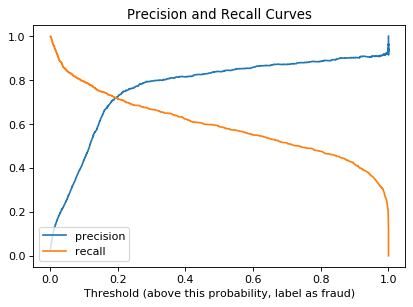

In [312]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, log.predict_proba(x_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

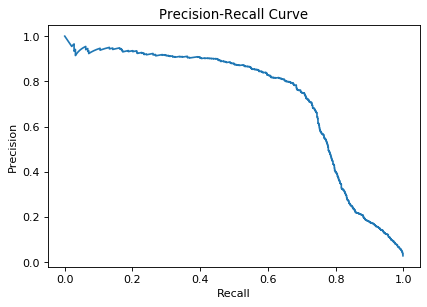

In [313]:

plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

In [314]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, log.predict_proba(x_test)[:,1])

ROC AUC score =  0.9683839256770471


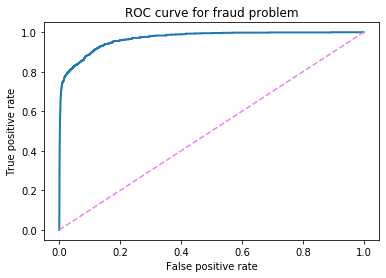

In [315]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem');
print("ROC AUC score = ", roc_auc_score(y_test, log.predict_proba(x_test)[:,1]))

In [ ]:
def plot_features(df, sample_size=500):
    
    sample = (df.drop(['user_id'],axis=1)
                .sample(1000, random_state=44)) 
    sns.pairplot(sample,hue='2019_elite_status', plot_kws=dict(alpha=.3, edgecolor='none'))

plot_features(df)

In [779]:
df

,user_id,average_stars_2018,compliment_cool_2018,compliment_cute_2018,compliment_funny_2018,compliment_hot_2018,compliment_list_2018,compliment_more_2018,compliment_note_2018,compliment_photos_2018,compliment_plain_2018,compliment_profile_2018,compliment_writer_2018,cool_2018,elite_2018,fans_2018,friends_2018,funny_2018,name_2018,review_count_2018,useful_2018,yelping_since_2018,num_friends_2018,2018_elite_status,num_years_elite_2018,num_compliments_2018,num_votes_2018,num_days_acct_created_2018,2017_elite_status,average_stars_2017,compliment_cool_2017,compliment_cute_2017,compliment_funny_2017,compliment_hot_2017,compliment_list_2017,compliment_more_2017,compliment_note_2017,compliment_photos_2017,compliment_plain_2017,compliment_profile_2017,compliment_writer_2017,cool_2017,elite_2017,fans_2017,friends_2017,funny_2017,name_2017,review_count_2017,useful_2017,yelping_since_2017,num_friends_2017,num_years_elite_2017,num_compliments_2017,num_votes_2017,num_days_acct_created_2017,num_reviews_2017,num_reviews_2018,mean_num_word_2017,mean_num_word_2018,mean_num_chars_2017,mean_num_chars_2018,mean_review_varience_2017,mean_review_varience_2018,unique_categories_2017,unique_categories_2018,num_compliment_2017,num_compliment_2018,mean_num_word_2017_tip,mean_num_word_2018_tip,mean_num_chars_2017_tip,mean_num_chars_2018_tip,num_votes_delta,num_compliments_delta,num_friends_delta,review_count_delta,fans_delta
0,qwiD67NYQR3PmRg5jnuRdA,4.14,0,0,0,0,0,0,1,0,0,0,0,10,0,1,"GGTF7hnQi6D5W77_qiKlqg, ptqOIs3ZwYPMU466assCQg",39,Mustapha,109,38,2014-12-11 00:19:59,2.0,0,1,1,87,1480,False,4.14,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,31.0,None,0.0,"GGTF7hnQi6D5W77_qiKlqg, ptqOIs3ZwYPMU466assCQg",31.0,Mustapha,109.0,47.0,2014-12-11,2.0,0,1.0,109.0,1116.0,3.0,NaN,157.333333,NaN,842.666667,NaN,0.916667,NaN,"Car Dealers, Automotive,Italian, Pizza, Bars, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,-22.0,0.0,0.0,0.0,1.0
1,p-MUwKepqz9GVXN_TOw6QA,3.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,1,Bianca,4,0,2016-04-26 20:40:42,NaN,0,1,0,1,978,False,5.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,NaN,0.0,Bianca,2.0,0.0,2016-04-26,NaN,0,0.0,0.0,614.0,1.0,2.0,41.000000,86.500000,212.000000,442.000000,1.000000,2.5000,"Cajun/Creole, Restaurants, Barbeque, Southern,...",4.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,2.0,0.0
2,3SM1prlFXIAw0DSS_HgSzg,3.38,0,0,0,1,0,1,0,0,1,0,0,28,0,2,"YB3VkwJhRiBeudErOBcGkA, 3su6_93gWpREGnC0RXP2wg...",29,Yongjoen,162,61,2013-12-17 18:19:23,3.0,0,1,3,118,1839,False,3.43,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144.0,None,1.0,"YB3VkwJhRiBeudErOBcGkA, 3su6_93gWpREGnC0RXP2wg",148.0,Yongjoen,116.0,163.0,2013-12-17,2.0,0,1.0,455.0,1475.0,NaN,3.0,NaN,50.666667,NaN,263.333333,NaN,1.7500,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,-337.0,2.0,1.0,46.0,1.0
3,fu3Aeg82ynMB3ZaLkk3L4w,3.08,0,0,0,0,0,0,0,0,0,0,0,4,0,1,"EbwQ55SiAZqVPNXEwvHUnw, cinifUrqDUIEnSGpfNvDmg...",12,Maria,13,28,2012-08-21 17:04:05,91.0,0,1,0,44,2322,False,3.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,1.0,"v-VJtBPN9vF9KHuaHs_fEQ, V9oEHhsLxTNCgn1cLD3MiA...",2.0,Maria,13.0,0.0,2012-08-21,90.0,0,0.0,2.0,1958.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,0.0,1.0,0.0,0.0
4,FFTdfe86jTpYJYkLQTHSHw,2.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"T0C1Ac5jqgL8yTmnSeICNw, MSsUkZTDoLRWnx6FqvO2rA...",0,Chris,2,1,2011-02-05 19:15:13,832.0,0,1,0,1,2885,False,2.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0.0,"QU35VMUjeauwA1z1xPvRYw, 4GG2yW7-HIngJElnVHzAQw...",0.0,Chris,2.0,0.0,2011-02-05,656.0,0,0.0,0.0,2521.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,176.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199996,JBYHvl7Y7d5Y4e44eqzJBw,3.84,0,0,0,0,0,0,0,0,1,0,0,6,0,0,"Adnk2Ff8ohLAqk2JFGR

In [842]:
#TIME TO BOOST
df['2018_elite_status'] = df['2018_elite_status'].astype(int)
df['2017_elite_status'].fillna(False, inplace = True)

x_train, x_test, y_train, y_test = train_test_split(df[['review_count_delta','num_votes_delta',
                                                        'num_compliments_delta','num_years_elite_2017',
                                                        'fans_delta','average_stars_2018','2017_elite_status',
                                                        'mean_review_num_chars_2018','mean_review_num_word_2018','num_days_acct_created_2018',
                                                        'num_friends_delta','unique_categories_2018',
                                                        'num_reviews_2017','mean_review_num_word_2017', 'review_count_2018','review_count_2017',
                                                        'num_compliments_2018','num_votes_2018'
                                                       ]], 
                                                    df['2018_elite_status'], 
                                                    test_size = 0.2, random_state=42)


In [843]:
#BOOSTING!

gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=6,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, #.05 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.75
                       )

eval_set=[(x_train,y_train),(x_test,y_test)]
fit_model = gbm.fit( 
                    x_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )

accuracy_score(y_test, gbm.predict(x_test, ntree_limit=gbm.best_ntree_limit))

0.9953001174970626

In [845]:

print("Default threshold:")
print("Accuracy: {:6.5f}, Precision: {:6.5f},   Recall: {:6.5f}, F1_score: {:6.5f}".format(
                    accuracy_score(y_test, fit_model.predict(x_test, ntree_limit=gbm.best_ntree_limit)),
                    precision_score(y_test, fit_model.predict(x_test, ntree_limit=gbm.best_ntree_limit)),
                    recall_score(y_test, fit_model.predict(x_test, ntree_limit=gbm.best_ntree_limit)),
                    f1_score(y_test, fit_model.predict(x_test, ntree_limit=gbm.best_ntree_limit))
))

#Accuracy: 0.99445, Precision: 0.91354,   Recall: 0.86319, F1_score: 0.88765 without friends
#Accuracy: 0.99460, Precision: 0.91667,   Recall: 0.86614, F1_score: 0.89069 with friends
#Accuracy: 0.99465, Precision: 0.90752,   Recall: 0.87894, F1_score: 0.89300 with varience stat
#Accuracy: 0.99473, Precision: 0.91624,   Recall: 0.87205, F1_score: 0.89360 with category counts
#Accuracy: 0.99473, Precision: 0.91538,   Recall: 0.87303, F1_score: 0.89370
#Accuracy: 0.99498, Precision: 0.91371,   Recall: 0.88583, F1_score: 0.89955
#Accuracy: 0.99515, Precision: 0.91939,   Recall: 0.88681, F1_score: 0.90281
#Accuracy: 0.99520, Precision: 0.91700,   Recall: 0.89173, F1_score: 0.90419




Default threshold:
Accuracy: 0.99530, Precision: 0.92159,   Recall: 0.89075, F1_score: 0.90591


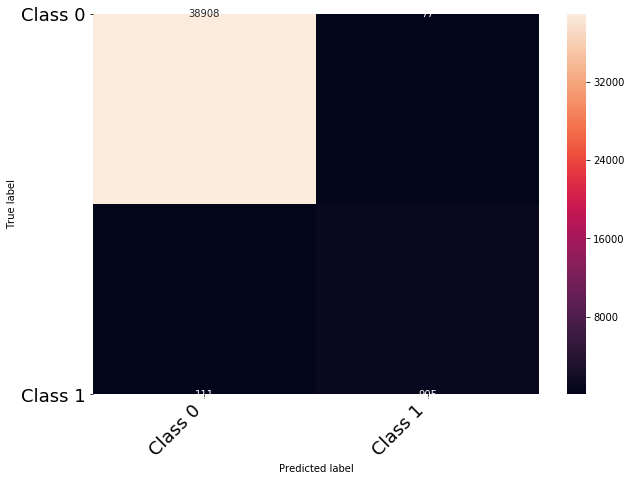

In [851]:
y_pred = fit_model.predict(x_test)
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm = print_confusion_matrix(conf_mat, ['Class 0', 'Class 1'])

In [823]:
x_test['pred_y'] = gbm.predict(x_test)

In [829]:
x_test['pred_proba'] = gbm.predict_proba(x_test)[:,1]

In [680]:
x_test = pd.merge(x_test,y_test ,how = 'left',left_index = True, right_index = True)


In [830]:
df_pred = pd.merge(x_test,df,how = 'left',left_index = True, right_index = True)

Exception ignored in: <function Booster.__del__ at 0x1a3cb8bc20>
Traceback (most recent call last):
  File "/Users/chen/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py", line 957, in __del__
    if self.handle is not None:
AttributeError: 'Booster' object has no attribute 'handle'


In [682]:
pd.reset_option('display.max_colwidth')

In [833]:
df_pred[(df_pred['2018_elite_status'] == 1) & (df_pred['pred_proba'] < .5)].head(100)

,review_count_delta_x,num_votes_delta_x,num_compliments_delta_x,num_years_elite_2017_x,fans_delta_x,average_stars_2018_x,2017_elite_status_x,mean_review_num_chars_2018_x,mean_review_num_word_2018_x,num_days_acct_created_2018_x,num_friends_delta_x,unique_categories_2018_x,num_reviews_2017_x,mean_review_num_word_2017_x,review_count_2018_x,review_count_2017_x,num_compliments_2018_x,num_votes_2018_x,pred_proba,2017_elite_status_y,2018_elite_status,average_stars_2017,average_stars_2018_y,compliment_cool_2017,compliment_cool_2018,compliment_cute_2017,compliment_cute_2018,compliment_funny_2017,compliment_funny_2018,compliment_hot_2017,compliment_hot_2018,compliment_list_2017,compliment_list_2018,compliment_more_2017,compliment_more_2018,compliment_note_2017,compliment_note_2018,compliment_photos_2017,compliment_photos_2018,compliment_plain_2017,compliment_plain_2018,compliment_profile_2017,compliment_profile_2018,compliment_writer_2017,compliment_writer_2018,cool_2017,cool_2018,elite_2017,elite_2018,fans_2017,fans_2018,friends_2017,friends_2018,funny_2017,funny_2018,mean_compliment_num_chars_2017,mean_compliment_num_chars_2018,mean_compliment_num_word_2017,mean_compliment_num_word_2018,mean_review_num_chars_2017,mean_review_num_chars_2018_y,mean_review_num_word_2017_y,mean_review_num_word_2018_y,mean_review_varience_2017,mean_review_varience_2018,name_2017,name_2018,num_compliment_2017,num_compliment_2018,num_compliments_2017,num_compliments_2018_y,num_days_acct_created_2017,num_days_acct_created_2018_y,num_friends_2017,num_friends_2018,num_reviews_2017_y,num_reviews_2018,num_votes_2017,num_votes_2018_y,num_years_elite_2017_y,num_years_elite_2018,review_count_2017_y,review_count_2018_y,unique_categories_2017,unique_categories_2018_y,useful_2017,useful_2018,user_id,yelping_since_2017,yelping_since_2018,num_votes_delta_y,num_compliments_delta_y,num_friends_delta_y,review_count_delta_y,fans_delta_y
111180,12.0,82.0,7.0,0,1.0,3.57,0,747.100000,138.500000,1665,1.0,31.0,9.0,205.333333,44,32.0,9,88,0.376935,0,1,3.56,3.57,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,2,1.0,1,0.0,1,1.0,1,0.0,0,0.0,4,0.0,17,None,2018,0.0,1,NaN,"D43OWyfzIQjL8feJpYh2SQ, u3ZPMVVEzneq8x856WksJQ",3.0,17,51.000000,35.333333,5.000000,6.666667,1093.888889,747.100000,205.333333,138.500000,1.472222,1.350000,Casey,Casey,0.0,0.0,2.0,9,1301.0,1665,1.0,2.0,9.0,10.0,6.0,88,0,1,32.0,44,28.0,31.0,3.0,54,RjoQDmgJ-7goXbaMjZ37Nw,2014-06-09,2014-06-09 14:51:37,82.0,7.0,1.0,12.0,1.0
82704,4.0,62.0,2.0,2,0.0,3.26,1,0.000000,0.000000,1714,12.0,0.0,19.0,132.947368,53,49.0,12,121,0.285472,1,1,3.28,3.26,3.0,3,0.0,0,3.0,3,1.0,1,0.0,0,0.0,1,1.0,1,0.0,0,2.0,3,0.0,0,0.0,0,11.0,29,"2017, 2016","2016,2017,2018",0.0,0,"TiUy4PhpBrxsDiz1-Km1BA, thvLxRkp8JjZgs3fkUSn1Q...","g7WJOyh6Sf9Wpv6BA2KjrQ, GN_1bevqnEncfysi9YUtMg...",9.0,25,NaN,NaN,NaN,NaN,717.578947,0.000000,132.947368,0.000000,0.960526,0.000000,Derek,Derek,NaN,NaN,10.0,12,1350.0,1714,57.0,69.0,19.0,0.0,59.0,121,2,3,49.0,53,41.0,0.0,39.0,67,PF07QY_dBTNGavc8CYBv5w,2014-04-21,2014-04-21 13:51:21,62.0,2.0,12.0,4.0,0.0
82110,NaN,29.0,1.0,0,NaN,3.73,0,338.937500,64.250000,285,NaN,30.0,0.0,0.000000,53,NaN,1,29,0.392543,0,1,NaN,3.73,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,NaN,7,NaN,2018,NaN,2,NaN,UMI2ovRPXNPMvZL1rkx80A,NaN,3,NaN,NaN,NaN,NaN,0.000000,338.937500,0.000000,64.250000,0.000000,0.890625,NaN,Brad,NaN,NaN,0.0,1,NaN,285,NaN,1.0,0.0,16.0,0.0,29,0,1,NaN,53,0.0,30.0,NaN,19,NK-qxSBld_XQUAMd_D_KCQ,NaT,2018-03-20 09:02:29,29.0,1.0,NaN,NaN,NaN
15850,8.0,40.0,0.0,1,0.0,4.09,1,NaN,NaN,1301,3.0,NaN,NaN,NaN,61,53.0,4,62,0.381904,1,1,4.07,4.09,1.0,1,1.0,1,1.0,1,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,1.0,1,0.0,0,0.0,0,3.0,14,2017,"2017,2018",1.0,1,"VlGUZaEoCz3dCMC4Zal5zA, lj1cvEKmOlq1GiP1UIlYYg...","lj1cvEKmOlq1GiP1UIlYYg, RSG0TMGYeTp5IZuw8Ybhhw...",9.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mary,Mary,NaN,NaN,4.0,4,937.0,1301,7.0,10.0,NaN,NaN,22.0,62,1,2,53.0,61,NaN,NaN,10.0,41,58P4CVY8VJ-Mtjm3KMS2-A,2015-06-08,2015-06-08 23:34:22,40.0,0.0,3.0,

In [838]:
df_pred[(df_pred['2018_elite_status'] == 0) & (df_pred['pred_proba'] > .5)].sort_values(['pred_proba'],ascending=False)


,review_count_delta_x,num_votes_delta_x,num_compliments_delta_x,num_years_elite_2017_x,fans_delta_x,average_stars_2018_x,2017_elite_status_x,mean_review_num_chars_2018_x,mean_review_num_word_2018_x,num_days_acct_created_2018_x,num_friends_delta_x,unique_categories_2018_x,num_reviews_2017_x,mean_review_num_word_2017_x,review_count_2018_x,review_count_2017_x,num_compliments_2018_x,num_votes_2018_x,pred_proba,2017_elite_status_y,2018_elite_status,average_stars_2017,average_stars_2018_y,compliment_cool_2017,compliment_cool_2018,compliment_cute_2017,compliment_cute_2018,compliment_funny_2017,compliment_funny_2018,compliment_hot_2017,compliment_hot_2018,compliment_list_2017,compliment_list_2018,compliment_more_2017,compliment_more_2018,compliment_note_2017,compliment_note_2018,compliment_photos_2017,compliment_photos_2018,compliment_plain_2017,compliment_plain_2018,compliment_profile_2017,compliment_profile_2018,compliment_writer_2017,compliment_writer_2018,cool_2017,cool_2018,elite_2017,elite_2018,fans_2017,fans_2018,friends_2017,friends_2018,funny_2017,funny_2018,mean_compliment_num_chars_2017,mean_compliment_num_chars_2018,mean_compliment_num_word_2017,mean_compliment_num_word_2018,mean_review_num_chars_2017,mean_review_num_chars_2018_y,mean_review_num_word_2017_y,mean_review_num_word_2018_y,mean_review_varience_2017,mean_review_varience_2018,name_2017,name_2018,num_compliment_2017,num_compliment_2018,num_compliments_2017,num_compliments_2018_y,num_days_acct_created_2017,num_days_acct_created_2018_y,num_friends_2017,num_friends_2018,num_reviews_2017_y,num_reviews_2018,num_votes_2017,num_votes_2018_y,num_years_elite_2017_y,num_years_elite_2018,review_count_2017_y,review_count_2018_y,unique_categories_2017,unique_categories_2018_y,useful_2017,useful_2018,user_id,yelping_since_2017,yelping_since_2018,num_votes_delta_y,num_compliments_delta_y,num_friends_delta_y,review_count_delta_y,fans_delta_y
143964,38.0,149.0,5.0,1,3.0,3.86,1,787.333333,139.666667,2147,2.0,18.0,1.0,156.000000,138,100.0,23,211,0.987250,1,0,3.78,3.86,3.0,3,1.0,1,3.0,3,1.0,1,0.0,0,0.0,0,2.0,4,0.0,0,7.0,10,0.0,0,1.0,1,15.0,54,2017,2017,3.0,6,"eyJQeM5fkX8qaxQYbLQq9Q, qTbQQJmGVL3HpjntDyh4Dw...","q3o-YCf_gIMoYyeJz6CQYw, L8O4YgiWSybb93-45XZZ7A...",5.0,41,NaN,NaN,NaN,NaN,828.000000,787.333333,156.000000,139.666667,0.250000,0.083333,Justin,Justin,NaN,NaN,18.0,23,1783.0,2147,45.0,47.0,1.0,3.0,62.0,211,1,1,100.0,138,5.0,18.0,42.0,116,Qpp-bP3e99Oq52BONFDLkA,2013-02-12,2013-02-12 23:04:20,149.0,5.0,2.0,38.0,3.0
15307,45.0,581.0,19.0,3,7.0,3.17,1,NaN,NaN,2418,30.0,NaN,NaN,NaN,257,212.0,54,635,0.984031,1,0,3.09,3.17,7.0,13,0.0,0,7.0,13,2.0,5,0.0,0,2.0,3,4.0,6,3.0,3,7.0,7,1.0,2,2.0,2,19.0,147,"2015, 2017, 2016","2015,2016,2017",9.0,16,"BQkC6RneYfvfG6wRe0hsvQ, VeCwvsEdaDjqLKF5Rh80zg...","Cn1O4lBc2XaLerj7cd0Z2A, YT5pK_8X1EJ8VbpFBBWQBA...",9.0,130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sean,Sean,NaN,NaN,35.0,54,2054.0,2418,225.0,255.0,NaN,NaN,54.0,635,3,3,212.0,257,NaN,NaN,26.0,358,wsOx40lZIyQoIHuUFuUPNQ,2012-05-17,2012-05-17 03:19:14,581.0,19.0,30.0,45.0,7.0
194283,18.0,1647.0,11.0,9,2.0,3.85,1,NaN,NaN,3667,5.0,NaN,NaN,NaN,756,738.0,379,2024,0.969043,1,0,3.84,3.85,83.0,85,0.0,0,83.0,85,34.0,35,0.0,0,9.0,13,68.0,68,3.0,4,64.0,64,6.0,7,18.0,18,63.0,500,"2014, 2013, 2017, 2016, 2012, 2009, 2011, 2010...","2009,2010,2011,2012,2013,2014,2015,2016,2017",41.0,43,"UIgNOKk6-OrW4AmdaXXuVg, pwIPsyhSPmteSEImgwPgCQ...","4f0gBoYPB5EcCE7nMseluQ, yi9eAPNgnqBGaRQ_Eyz2Aw...",105.0,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amador,Amador,NaN,NaN,368.0,379,3303.0,3667,495.0,500.0,NaN,NaN,377.0,2024,9,9,738.0,756,NaN,NaN,209.0,1226,1FAKs3CAQQLBgdB23GeDIQ,2008-12-15,2008-12-15 03:14:44,1647.0,11.0,5.0,18.0,2.0
25857,6.0,539.0,13.0,1,5.0,3.54,1,0.000000,0.000000,1927,15.0,0.0,25.0,125.160000,166,160.0,52,808,0.958767,1,0,3.52,3.54,5.0,7,0.0,0,5.0,7,2.0,3,0.0,0,0.0,0,2.0,3,12.0,14,12.0,14,0.0,0,1.0,4,30.0,250,2017,2017,12.0,17,"A_qV1VhIQveiptpHqPaRKw, KLcFAQUkkUfc3IHKSUkC7Q...","ayf8F3Zw_qHPmKlj0Vykng, 

In [689]:
df_scope_review_business_18[df_scope_review_business_18['user_id']=='L_Ft1kZRot-UIlDf6WS9iQ']

,user_id,business_id,cool,date,funny,review_id,stars_review,text,useful,hours.Friday,attributes.Ambience,attributes.BestNights,hours,attributes.RestaurantsTableService,categories,attributes.DriveThru,hours.Saturday,city,attributes.RestaurantsReservations,attributes.BusinessAcceptsBitcoin,attributes.Caters,attributes.RestaurantsTakeOut,attributes.AgesAllowed,attributes.ByAppointmentOnly,attributes.GoodForDancing,stars_business,attributes.Alcohol,attributes.RestaurantsCounterService,longitude,hours.Thursday,attributes.BusinessParking,is_open,name,hours.Monday,attributes.NoiseLevel,attributes.CoatCheck,attributes.HappyHour,attributes.RestaurantsPriceRange2,attributes.BikeParking,hours.Sunday,latitude,review_count,attributes.Open24Hours,attributes.DietaryRestrictions,attributes.GoodForMeal,attributes.DogsAllowed,hours.Tuesday,attributes.HasTV,attributes.BYOB,attributes.BYOBCorkage,state,attributes.Smoking,attributes.HairSpecializesIn,attributes.RestaurantsAttire,attributes.OutdoorSeating,hours.Wednesday,attributes.Music,attributes.GoodForKids,attributes,attributes.RestaurantsGoodForGroups,address,attributes.RestaurantsDelivery,postal_code,attributes.WiFi,attributes.Corkage,attributes.WheelchairAccessible,attributes.AcceptsInsurance,attributes.BusinessAcceptsCreditCards,count_words,count_chars,user_to_mean_variance
121929,L_Ft1kZRot-UIlDf6WS9iQ,j3yOcW4kA2kOgHPtZ3Pr3Q,0,2013-01-15 04:35:29,0,H4odKpg_3SklSNL3IeQSEg,1.0,This place i is the worst of the embassy suite...,1,10:0-22:0,NaN,NaN,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",NaN,"Hotels & Travel, Hotels, Event Planning & Serv...",NaN,11:0-22:0,Phoenix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,-112.11418,11:0-22:0,NaN,0,Embassy Suites,11:0-22:0,NaN,NaN,NaN,2,NaN,11:0-22:0,33.624235,74,NaN,NaN,NaN,NaN,11:0-22:0,NaN,NaN,NaN,AZ,NaN,NaN,NaN,NaN,11:0-22:0,NaN,NaN,"{'RestaurantsPriceRange2': '2', 'WiFi': ""u'fre...",NaN,2577 W Greenway Rd,NaN,85023,u'free',NaN,NaN,NaN,True,173,906,1.0


# DID NOT USE MODELS

In [552]:
LSVC = LinearSVC()
LSVC.fit(x_train, y_train)
y_pred = LSVC.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

y_predict = LSVC.predict(x_test)

print("Default threshold:")
print("Accuracy: {:6.5f}, Precision: {:6.5f},   Recall: {:6.5f}, F1_score: {:6.5f}".format(
                    LSVC.score(x_test, y_test),
                    precision_score(y_test, y_predict), 
                    recall_score(y_test, y_predict),
                    f1_score(y_test, y_predict)))

#Accuracy: 0.98850, Precision: 0.81027,   Recall: 0.71457, F1_score: 0.75941


0.978025549361266
Default threshold:
Accuracy: 0.97803, Precision: 0.55241,   Recall: 0.71063, F1_score: 0.62161


/Users/chen/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [553]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)

print("Default threshold:")
print("Accuracy: {:6.5f}, Precision: {:6.5f},   Recall: {:6.5f}, F1_score: {:6.5f}".format(
                    knn.score(x_test, y_test),
                    precision_score(y_test, y_predict), 
                    recall_score(y_test, y_predict),
                    f1_score(y_test, y_predict)))

Default threshold:
Accuracy: 0.98003, Precision: 0.69620,   Recall: 0.37894, F1_score: 0.49076


In [555]:
DT = DecisionTreeClassifier(max_depth=7)
DT.fit(x_train, y_train)
y_predict = DT.predict(x_test)

print("Default threshold:")
print("Accuracy: {:6.5f}, Precision: {:6.5f},   Recall: {:6.5f}, F1_score: {:6.5f}".format(
                    DT.score(x_test, y_test),
                    precision_score(y_test, y_predict), 
                    recall_score(y_test, y_predict),
                    f1_score(y_test, y_predict)))

#Accuracy: 0.99375, Precision: 0.88765,   Recall: 0.86319, F1_score: 0.87525 
#Accuracy: 0.99410, Precision: 0.90206,   Recall: 0.86122, F1_score: 0.88117 with category

Default threshold:
Accuracy: 0.99410, Precision: 0.90206,   Recall: 0.86122, F1_score: 0.88117


In [554]:
randomforest = RandomForestClassifier(n_estimators=100)
randomforest.fit(x_train, y_train)

y_predict = randomforest.predict(x_test)

print("Default threshold:")
print("Accuracy: {:6.5f}, Precision: {:6.5f},   Recall: {:6.5f}, F1_score: {:6.5f}".format(
                    randomforest.score(x_test, y_test),
                    precision_score(y_test, y_predict), 
                    recall_score(y_test, y_predict),
                    f1_score(y_test, y_predict)))

#Accuracy: 0.99438, Precision: 0.91852,   Recall: 0.85433, F1_score: 0.88526

Default threshold:
Accuracy: 0.99438, Precision: 0.91852,   Recall: 0.85433, F1_score: 0.88526
